In [25]:
#Import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
%matplotlib inline

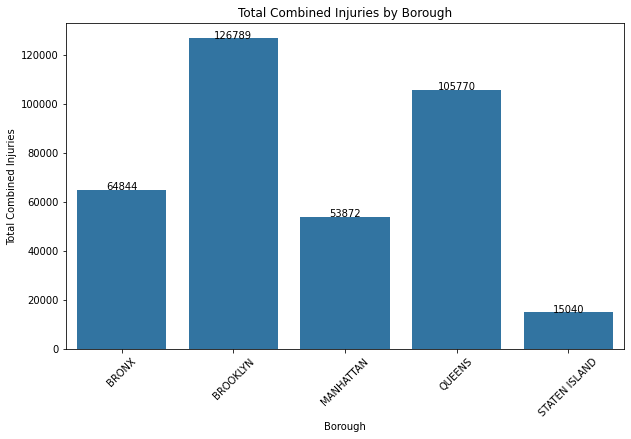

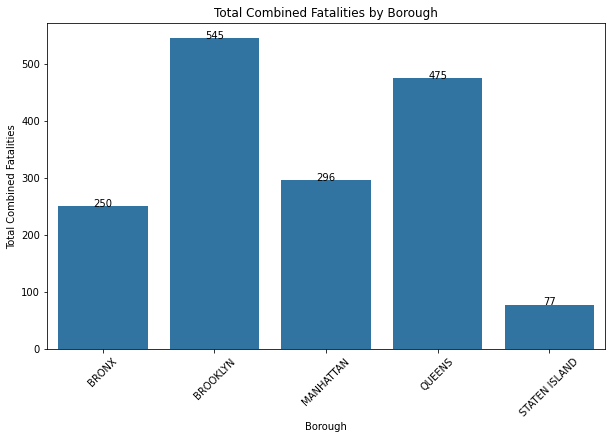

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Injury_and_Fatality dataset

injury_and_fatality = pd.read_csv('Injury_and_Fatality.csv')

# Step 1: Data Cleaning

# Convert CRASH DATE to datetime
injury_and_fatality['CRASH DATE'] = pd.to_datetime(injury_and_fatality['CRASH DATE'])

# Handle missing values (for simplicity, we'll drop rows with missing boroughs)
injury_and_fatality = injury_and_fatality.dropna(subset=['BOROUGH'])

# Fill NaN values in injury and fatality columns with 0
injury_and_fatality['NUMBER OF PERSONS INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PERSONS KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF CYCLIST INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF CYCLIST KILLED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF MOTORIST INJURED'].fillna(0, inplace=True)
injury_and_fatality['NUMBER OF MOTORIST KILLED'].fillna(0, inplace=True)

# Convert injury and fatality columns to int64
injury_and_fatality['NUMBER OF PERSONS INJURED'] = injury_and_fatality['NUMBER OF PERSONS INJURED'].astype('int64')
injury_and_fatality['NUMBER OF PERSONS KILLED'] = injury_and_fatality['NUMBER OF PERSONS KILLED'].astype('int64')
injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'] = injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'].astype('int64')
injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'] = injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'].astype('int64')
injury_and_fatality['NUMBER OF CYCLIST INJURED'] = injury_and_fatality['NUMBER OF CYCLIST INJURED'].astype('int64')
injury_and_fatality['NUMBER OF CYCLIST KILLED'] = injury_and_fatality['NUMBER OF CYCLIST KILLED'].astype('int64')
injury_and_fatality['NUMBER OF MOTORIST INJURED'] = injury_and_fatality['NUMBER OF MOTORIST INJURED'].astype('int64')
injury_and_fatality['NUMBER OF MOTORIST KILLED'] = injury_and_fatality['NUMBER OF MOTORIST KILLED'].astype('int64')

# Remove Duplicates
injury_and_fatality.drop_duplicates(inplace=True)

# Step 2: Aggregate Data

# Create new columns for total injuries and fatalities
injury_and_fatality['TOTAL_INJURED'] = (
    injury_and_fatality['NUMBER OF PERSONS INJURED'] +
    injury_and_fatality['NUMBER OF PEDESTRIANS INJURED'] +
    injury_and_fatality['NUMBER OF CYCLIST INJURED'] +
    injury_and_fatality['NUMBER OF MOTORIST INJURED']
)

injury_and_fatality['TOTAL_KILLED'] = (
    injury_and_fatality['NUMBER OF PERSONS KILLED'] +
    injury_and_fatality['NUMBER OF PEDESTRIANS KILLED'] +
    injury_and_fatality['NUMBER OF CYCLIST KILLED'] +
    injury_and_fatality['NUMBER OF MOTORIST KILLED']
)

# Summarize data for total counts
borough_summary_total = injury_and_fatality.groupby('BOROUGH').sum(numeric_only=True)[['TOTAL_INJURED', 'TOTAL_KILLED']].reset_index()

# Step 3: Visualize Data

# Visualize Total Combined Injuries and Fatalities
plt.figure(figsize=(10, 6))
combined_plot_total = sns.barplot(x='BOROUGH', y='TOTAL_INJURED', data=borough_summary_total)

# Add numbers on top of bars for total combined injuries
for index, row in borough_summary_total.iterrows():
    combined_plot_total.text(index, row['TOTAL_INJURED'], int(row['TOTAL_INJURED']), color='black', ha="center")

plt.title('Total Combined Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Combined Injuries')
plt.xticks(rotation=45)
plt.show()

# Visualize Total Fatalities
plt.figure(figsize=(10, 6))
fatalities_plot_total = sns.barplot(x='BOROUGH', y='TOTAL_KILLED', data=borough_summary_total)

# Add numbers on top of bars for total fatalities
for index, row in borough_summary_total.iterrows():
    fatalities_plot_total.text(index, row['TOTAL_KILLED'], int(row['TOTAL_KILLED']), color='black', ha="center")

plt.title('Total Combined Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Total Combined Fatalities')
plt.xticks(rotation=45)
plt.show()
